In [ ]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [ ]:
import pandas as pd    
import numpy as np     
stridesegmentation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Datalabelling/LeftAnklestridesegments1.csv')

In [ ]:
fulldata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Fulldatasetwalking.csv')

In [ ]:
data_1 = fulldata[(fulldata['loc_id'] == 'left_ankle') ]

In [ ]:
stridesegmentation['tau_i'] = stridesegmentation['tau_i'].astype(int)

In [ ]:
data_1 = data_1.reset_index(drop=True) 

In [ ]:
stridesegmentation

,tau_i,T_i,sim_i,template_i
0,39,104,0.972586,1
1,142,110,0.975072,8
2,251,110,0.986581,13
3,360,106,0.973304,13
4,465,104,0.980917,8
...,...,...,...,...
6415,647154,102,0.986515,13
6416,647255,101,0.989298,1
6417,647355,103,0.988815,5
6418,647457,102,0.977136,11


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
count = 0
count2 = 0
data_1['label'] = 0
stride_list = []
fullstride_list = []
x =[]
for i in range(0,len(stridesegmentation.tau_i)-1):
  eachStride = data_1.loc[ stridesegmentation.tau_i[i] : stridesegmentation.tau_i[i+1] -1 ] 
  peak, _ = find_peaks(eachStride["vm"].values, prominence = 0.9) 
  if (len(peak) == 1): 
    count = count+1;   
    data_1.loc[stridesegmentation.tau_i[i] : eachStride.iloc[peak].index[0],"label"] = 0
    left = data_1.loc[stridesegmentation.tau_i[i] : eachStride.iloc[peak].index[0]]
    data_1.loc[eachStride.iloc[peak].index[0]  : stridesegmentation.tau_i[i+1] - 1,"label"] = 1     
    right = data_1.loc[eachStride.iloc[peak].index[0]  : stridesegmentation.tau_i[i+1] - 1]
    fullst = pd.concat([left,right])
    fullstride_list.append(fullst)
    right = right.reset_index(drop=True) 
    left = left.reset_index(drop=True) 
    #imputing zeros for left stride
    il = np.arange(start= left.shape[0]  , stop=145 )
    dfl_zero = pd.DataFrame(0, index=il, columns=left.columns)
    LeftStride = pd.concat([left,dfl_zero])  

    #imputing zeros for right stride
    ir = np.arange(start= right.shape[0]  , stop=145 )
    dfr_zero = pd.DataFrame(0, index=ir, columns=right.columns)
    RightStride = pd.concat([right,dfr_zero])  

    stride = pd.concat([LeftStride,RightStride]) 
    stride_list.append(stride) 
    
dataset1 = pd.concat(stride_list)

In [ ]:
count

477

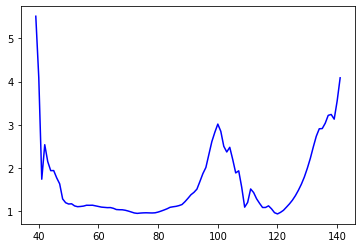

In [ ]:
fullstride_list[0]["vm"][:145].plot.line()
fullstride_list[0]["vm"][145:].plot.line()

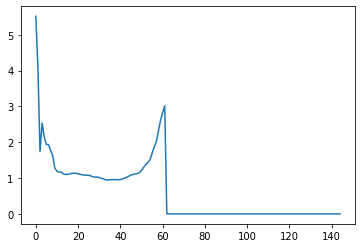

In [ ]:
#left stride
stride_list[0]["vm"][:145].plot.line()  

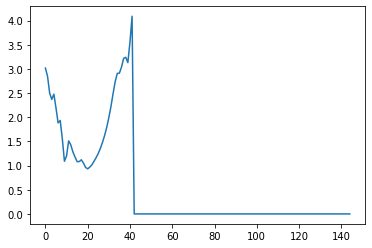

In [ ]:
#right stride
stride_list[0]["vm"][145:].plot.line()

In [ ]:
dataset1.shape 

(138330, 8)

In [ ]:
dataset1.to_csv("Datasetfor1peaks.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
count = 0
count2 = 0
stride_list1 = []
data_1['label'] = 0

for i in range(0,len(stridesegmentation.tau_i)-1): 
  eachStride = data_1.loc[ stridesegmentation.tau_i[i] : stridesegmentation.tau_i[i+1] -1 ] 
  peak, _ = find_peaks(eachStride["vm"].values, prominence = 0.9) 
  if (len(peak) == 2):
    count = count + 1
    peak2, _ = find_peaks(eachStride["vm"].values, threshold = 1 )
    if (len(peak2) == 1):
      count2 = count2+1; 
      data_1.loc[stridesegmentation.tau_i[i] : eachStride.iloc[peak].index[0],"label"] = 0
      left1 = data_1.loc[stridesegmentation.tau_i[i] : eachStride.iloc[peak].index[0]]
      data_1.loc[eachStride.iloc[peak].index[0]  : stridesegmentation.tau_i[i+1] - 1,"label"] = 1 
      right1 = data_1.loc[eachStride.iloc[peak].index[0]  : stridesegmentation.tau_i[i+1] - 1]

      #imputing zeros for left stride
      il1 = np.arange(start= left1.shape[0] + 1 , stop=145 )
      dfl1_zero = pd.DataFrame(0, index=il1, columns=left1.columns)
      LeftStride1 = pd.concat([left1,dfl1_zero])  

      #imputing zeros for right stride
      ir1 = np.arange(start= right1.shape[0] + 1 , stop=145 )
      dfr1_zero = pd.DataFrame(0, index=ir1, columns=right1.columns)
      RightStride1 = pd.concat([right1,dfr1_zero])  

      stride1 = pd.concat([LeftStride1,RightStride1]) 
      stride_list1.append(stride1)
      

print("2's",count)
print("2's changed to 1's: ",count2) 

2's 2228
2's changed to 1's:  701


In [ ]:
dataset2 = pd.concat(stride_list1)

In [ ]:
dataset2.shape

(201894, 8)

In [ ]:
dataset2.to_csv("2schangedto1s_701of2228_zeroimputations.csv")

In [ ]:
dataset = pd.concat([dataset1,dataset2] ) 
dataset.shape 

(340224, 8)

In [ ]:
dataset.to_csv("fulldataset1and2Zeroimputations.csv")

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt 
# from scipy.signal import find_peaks
# count = 0
# count2 = 0
# stride_list2 = []
# data_1['label'] = 0 
# for i in range(0,len(stridesegmentation.tau_i)-1): 
#   eachStride = data_1.loc[ stridesegmentation.tau_i[i] : stridesegmentation.tau_i[i+1] -1 ] 
#   peak, _ = find_peaks(eachStride["vm"].values, prominence = 0.9) 
#   if (len(peak) == 3):
#     count = count + 1
#     peak2, _ = find_peaks(eachStride["vm"].values, threshold = 1 )
#     if (len(peak2) == 1):
#       count2 = count2+1;
#       left = data_1.loc[stridesegmentation.tau_i[i]:peak[0],"label"] = 0
#       right = data_1.loc[peak[0]:stridesegmentation.tau_i[i+1] - 1,"label"] = 1 
#       stride = pd.concat([left,right])
#       stride_list2.append(stride) 